# Hodgkin-Huxley モデル
『ゼロから作るSpiking Neural Networks』第一章の「1.1 Hodgkin-Huxley モデル」をNotebook化したものです。


## Hodgkin-Huxley モデルにおける膜の等価回路モデル
**Hodgkin-Huxley モデル** (HH モデル)は, A.L. HodgkinとA.F. Huxleyによって1952年に考案されたニューロンの膜興奮を表すモデルです. 彼らはヤリイカの巨大神経軸索に対する**電位固定法**(voltage-clamp)を用いた実験を行い, 実験から得られた観測結果を元にモデルを構築しています.

HHモデルには等価な電気回路モデルがあり, **膜の並列等価回路モデル** (parallel conductance model)と呼ばれています. 膜の並列等価回路モデルでは, ニューロンの細胞膜をコンデンサ, 細胞膜に埋まっているイオンチャネルを可変抵抗 (動的に変化する抵抗) として置き換えます.

**イオンチャネル** (ion channel)は特定のイオン(例えばナトリウムイオンやカリウムイオンなど)を選択的に通す膜輸送体の一種です. それぞれのイオンの種類において, 異なるイオンチャネルがあります (また同じイオンでも複数の種類のイオンチャネルがあります). また, イオンチャネルにはイオンの種類に応じて異なる**コンダクタンス**(抵抗の逆数で電流の「流れやすさ」を意味します)と**平衡電位**(equilibrium potential)があります. 
HHモデルでは, ナトリウム(Na$^{+}$)チャネル, カリウム(K$^{+}$)チャネル, 漏れ電流(leak current)のイオンチャネルを仮定します. 漏れ電流のイオンチャネルは当時特定できなかったチャネルで, 膜から電流が漏れ出すチャネルを意味します. なお, 現在では漏れ電流の多くはCl$^{-}$イオン(chloride ion)によることが分かっています. 

<img src="https://raw.githubusercontent.com/takyamamoto/SNN-from-scratch-with-Python/master/notebook/images/parallel_conductance_model.JPG" width="350px">

それでは, 等価回路モデルを用いて電位変化の式を立ててみましょう. 上図において, $C_m$を細胞膜のキャパシタンス(膜容量), $I_{m}(t)$を細胞膜を流れる電流(外部からの入力電流), $I_\text{Cap}(t)$を膜のコンデンサを流れる電流、
$I_\text{Na}(t)$, $I_K(t)$をそれぞれナトリウムチャネルとカリウムチャネルを通って膜から流出する電流で, $I_\text{L}(t)$は漏れ電流です. このとき、

\begin{equation}
I_{m}(t)=I_\text{Cap}(t)+I_\text{Na}(t)+I_\text{K}(t)+I_\text{L}(t)    
\end{equation}

という仮定をしています.

膜電位を$V(t)$とすると, Kirchhoffの第二法則 (Kirchhoff's Voltage Law)より, 

\begin{equation}
\underbrace{C_m\frac {dV(t)}{dt}}_{I_\text{Cap}(t)}=I_{m}(t)-I_\text{Na}(t)-I_\text{K}(t)-I_\text{L}(t)
\end{equation}

となります. HodgkinとHuxleyはチャネル電流$I_\text{Na}, I_K, I_\text{L}$が従う式を実験的に求めました. 

\begin{align}
I_\text{Na}(t) &= g_{\text{Na}}\cdot m^{3}h(V-E_{\text{Na}})\\
I_\text{K}(t) &= g_{\text{K}}\cdot n^{4}(V-E_{\text{K}})\\
I_\text{L}(t) &= g_{\text{L}}(V-E_{\text{L}})
\end{align}

ただし、$g_{\text{Na}}, g_{\text{K}}$はそれぞれNa$^+$, K$^+$の最大コンダクタンスです。$g_{\text{L}}$はオームの法則に従うコンダクタンスで、Lコンダクタンスは時間的に変化はしません. また、$m$はNa$^+$コンダクタンスの活性化パラメータ、$h$はNa$^+$コンダクタンスの不活性化パラメータ、$n$はK$^+$コンダクタンスの活性化パラメータであり、ゲートの開閉確率を表しています。よって、HHモデルの状態は$V, m, h, n$の4変数で表されます。これらの変数は以下の$x$を$m, n, h$に置き換えた3つの微分方程式に従います. 

\begin{equation}
\frac{dx}{dt}=\alpha_{x}(V)(1-x)-\beta_{x}(V)x
\end{equation}

ただし、$V$の関数である$\alpha_{x}(V),\ \beta_{x}(V)$は$m, h, n$によって異なり、次の6つの式に従います。

\begin{equation}
\begin{array}{ll}
\alpha_{m}(V)=\dfrac {0.1(25-V)}{\exp \left[(25-V)/10\right]-1}, &\beta_{m}(V)=4\exp {(-V/18)}\\
\alpha_{h}(V)=0.07\exp {(-V/20)}, & \beta_{h}(V)={\dfrac{1}{\exp {\left[(30-V)/10 \right]}+1}}\\
\alpha_{n}(V)={\dfrac {0.01(10-V)}{\exp {\left[(10-V)/10\right]}-1}},& \beta_{n}(V)=0.125\exp {(-V/80)} 
\end{array}
\end{equation}

## Hodgkin-Huxley モデルの実装
それでは, これまでに説明した式を用いてHHモデルを実装してみましょう. 定数は次のように設定します. 

\begin{align*} 
C_m=1.0, g_{\text{Na}}=120, g_{\text{K}}=36, g_{\text{L}}=0.3\\
E_{\text{Na}}=50.0, E_{\text{K}}=-77, E_{\text{L}}=-54.387 
\end{align*}

基本的には以上の式を関数として定義し、微分方程式のソルバーに渡すだけです。ソルバーとしては陽的Euler法または4次のRunge-Kutta法を用います. 

まずライブラリをimportします.

In [1]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

次にHodgkin-Huxleyモデルのクラスを定義します.

In [2]:
class HodgkinHuxleyModel:
    def __init__(self, dt=1e-3, solver="RK4"):
        self.C_m  =   1.0 # 膜容量 (uF/cm^2)
        self.g_Na = 120.0 # Na+の最大コンダクタンス (mS/cm^2)
        self.g_K  =  36.0 # K+の最大コンダクタンス (mS/cm^2)
        self.g_L  =   0.3 # 漏れイオンの最大コンダクタンス (mS/cm^2)
        self.E_Na =  50.0 # Na+の平衡電位 (mV)
        self.E_K  = -77.0 # K+の平衡電位 (mV)
        self.E_L  = -54.387 #漏れイオンの平衡電位 (mV)
        
        self.solver = solver
        self.dt = dt
        
        # V, m, h, n
        self.states = np.array([-65, 0.05, 0.6, 0.32])
        self.I_m = None
    
    def Solvers(self, func, x, dt):
        # 4th order Runge-Kutta法
        if self.solver == "RK4":
            k1 = dt*func(x)
            k2 = dt*func(x + 0.5*k1)
            k3 = dt*func(x + 0.5*k2)
            k4 = dt*func(x + k3)
            return x + (k1 + 2*k2 + 2*k3 + k4) / 6
        
        # 陽的Euler法
        elif self.solver == "Euler": 
            return x + dt*func(x)
        else:
            return None
        
    # イオンチャネルのゲートについての6つの関数
    def alpha_m(self, V):
        return 0.1*(V+40.0)/(1.0 - np.exp(-(V+40.0) / 10.0))

    def beta_m(self, V):
        return 4.0*np.exp(-(V+65.0) / 18.0)

    def alpha_h(self, V):
        return 0.07*np.exp(-(V+65.0) / 20.0)

    def beta_h(self, V):
        return 1.0/(1.0 + np.exp(-(V+35.0) / 10.0))

    def alpha_n(self, V):
        return 0.01*(V+55.0)/(1.0 - np.exp(-(V+55.0) / 10.0))

    def beta_n(self, V):
        return 0.125*np.exp(-(V+65) / 80.0)

    # Na+電流 (uA/cm^2)
    def I_Na(self, V, m, h):
        return self.g_Na * m**3 * h * (V - self.E_Na)
    
    # K+電流 (uA/cm^2)
    def I_K(self, V, n):
        return self.g_K  * n**4 * (V - self.E_K)

    # 漏れ電流 (uA/cm^2)
    def I_L(self, V):
        return self.g_L * (V - self.E_L)
        
    # 微分方程式
    def dALLdt(self, states):
        V, m, h, n = states
        
        dVdt = (self.I_m - self.I_Na(V, m, h) \
                - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return np.array([dVdt, dmdt, dhdt, dndt])
    
    def __call__(self, I):
        self.I_m = I
        states = self.Solvers(self.dALLdt, self.states, self.dt)
        self.states = states
        return states

定義したモデルを用いてシミュレーションを実行します.

In [13]:
dt = 0.01; T = 350 # (ms)
nt = round(T/dt) # ステップ数
time = np.arange(0.0, T, dt)         

 # 刺激電流 (uA/cm^2)
I_inj = 10*(time>50) - 10*(time>150) + 35*(time>200) - 35*(time>300)
HH_neuron = HodgkinHuxleyModel(dt=dt, solver="Euler")

X_arr = np.zeros((nt, 4)) # 記録用配列

# シミュレーション
for i in tqdm(range(nt)):
    X = HH_neuron(I_inj[i])
    X_arr[i] = X

spike = np.bitwise_and(X_arr[:-1, 0] < 0, X_arr[1:, 0] > 0) # spikeの判定
print("Num. of spikes :", np.sum(spike))


Num. of spikes : 18


結果を描画します.

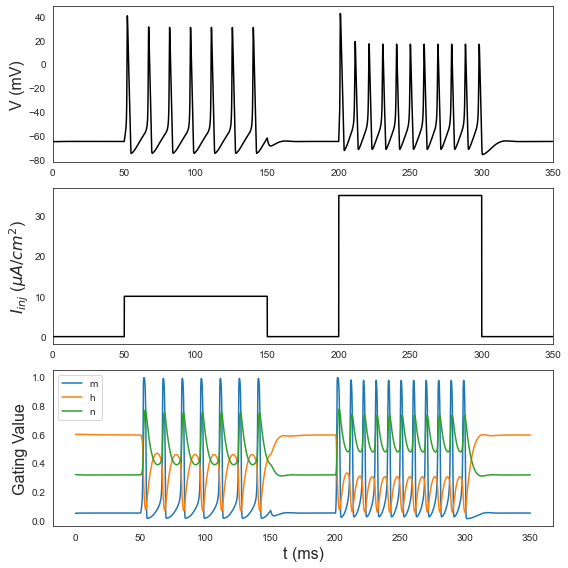

In [14]:
plt.figure(figsize=(8, 8))
plt.subplot(3,1,1)
plt.plot(time, X_arr[:,0], color="k")
plt.ylabel('V (mV)', size=16)
plt.xlim(0, T)

plt.subplot(3,1,2)
plt.plot(time, I_inj, color="k")
plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)', size=16)
plt.xlim(0, T)
plt.tight_layout()

plt.subplot(3,1,3)
plt.plot(time, X_arr[:,1],label='m')
plt.plot(time, X_arr[:,2], label='h')
plt.plot(time, X_arr[:,3], label='n')
plt.xlabel('t (ms)', size=16)
plt.ylabel('Gating Value', size=16)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()